In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

seed_no = 572

import warnings
warnings.filterwarnings("ignore")

# combine data

In [2]:
df_res_scaled = pd.read_csv('score_test_scaled.csv')
df_res_scaled_pca = pd.read_csv('score_test_scaled_pca.csv')
df_res_nonscaled = pd.read_csv('score_test_nonscale.csv')

print(df_res_scaled.shape, df_res_scaled_pca.shape, df_res_nonscaled.shape)

(8, 6) (8, 6) (8, 6)


In [3]:
df_res_all = pd.concat([df_res_scaled, df_res_scaled_pca, df_res_nonscaled])
df_res_all.reset_index(drop=True, inplace=True)
df_res_all['model_dataprep'] = df_res_all['model']+"_"+df_res_all['dataprep']
# df_res_all.head()


In [4]:
df_res_all.sort_values(by='score_test', ascending=False)

,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
17,K-Nearest Neighbors,0.997923,1.000000,1.000000,"{'n_neighbors': 171, 'p': 1, 'weights': 'distance'}",nonscaled,K-Nearest Neighbors_nonscaled
23,Support Vector Machine,0.985554,1.000000,0.994773,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}",nonscaled,Support Vector Machine_nonscaled
14,Random Forest,0.997913,1.000000,0.994773,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}",scaled_pca,Random Forest_scaled_pca
22,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",nonscaled,Random Forest_nonscaled
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",scaled,Random Forest_scaled
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled,Support Vector Machine_scaled
1,K-Nearest Neighbors,0.998962,1.000000,0.994492,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}",scaled,K-Nearest Neighbors_scaled
15,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled_pca,Support Vector Machine_scaled_pca
9,K-Nearest Neighbors,0.998962,1.000000,0.989199,"{'n_neighbors': 33, 'p': 2, 'weights': 'distance'}",scaled_pca,K-Nearest Neighbors_scaled_pca
11,Quadratic Discriminant Analysis,0.983481,0.993745,0.986466,{'reg_param': 0.0},scaled_pca,Quadratic Discriminant Analysis_scaled_pca


In [6]:
df_res_all.sort_values(by=['model', 'score_test'], ascending=False)

,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
23,Support Vector Machine,0.985554,1.000000,0.994773,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}",nonscaled,Support Vector Machine_nonscaled
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled,Support Vector Machine_scaled
15,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled_pca,Support Vector Machine_scaled_pca
14,Random Forest,0.997913,1.000000,0.994773,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}",scaled_pca,Random Forest_scaled_pca
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",scaled,Random Forest_scaled
22,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",nonscaled,Random Forest_nonscaled
11,Quadratic Discriminant Analysis,0.983481,0.993745,0.986466,{'reg_param': 0.0},scaled_pca,Quadratic Discriminant Analysis_scaled_pca
19,Quadratic Discriminant Analysis,0.954779,0.951820,0.938208,{'reg_param': 0.010101010101010102},nonscaled,Quadratic Discriminant Analysis_nonscaled
3,Quadratic Discriminant Analysis,0.940078,0.938947,0.928274,{'reg_param': 0.010101010101010102},scaled,Quadratic Discriminant Analysis_scaled
21,NaiveBayes,0.945847,0.953075,0.940558,{'var_smoothing': 0.0001},nonscaled,NaiveBayes_nonscaled


# plot

In [30]:
matric1 = 'macro avg'
matric2 = 'f1-score'

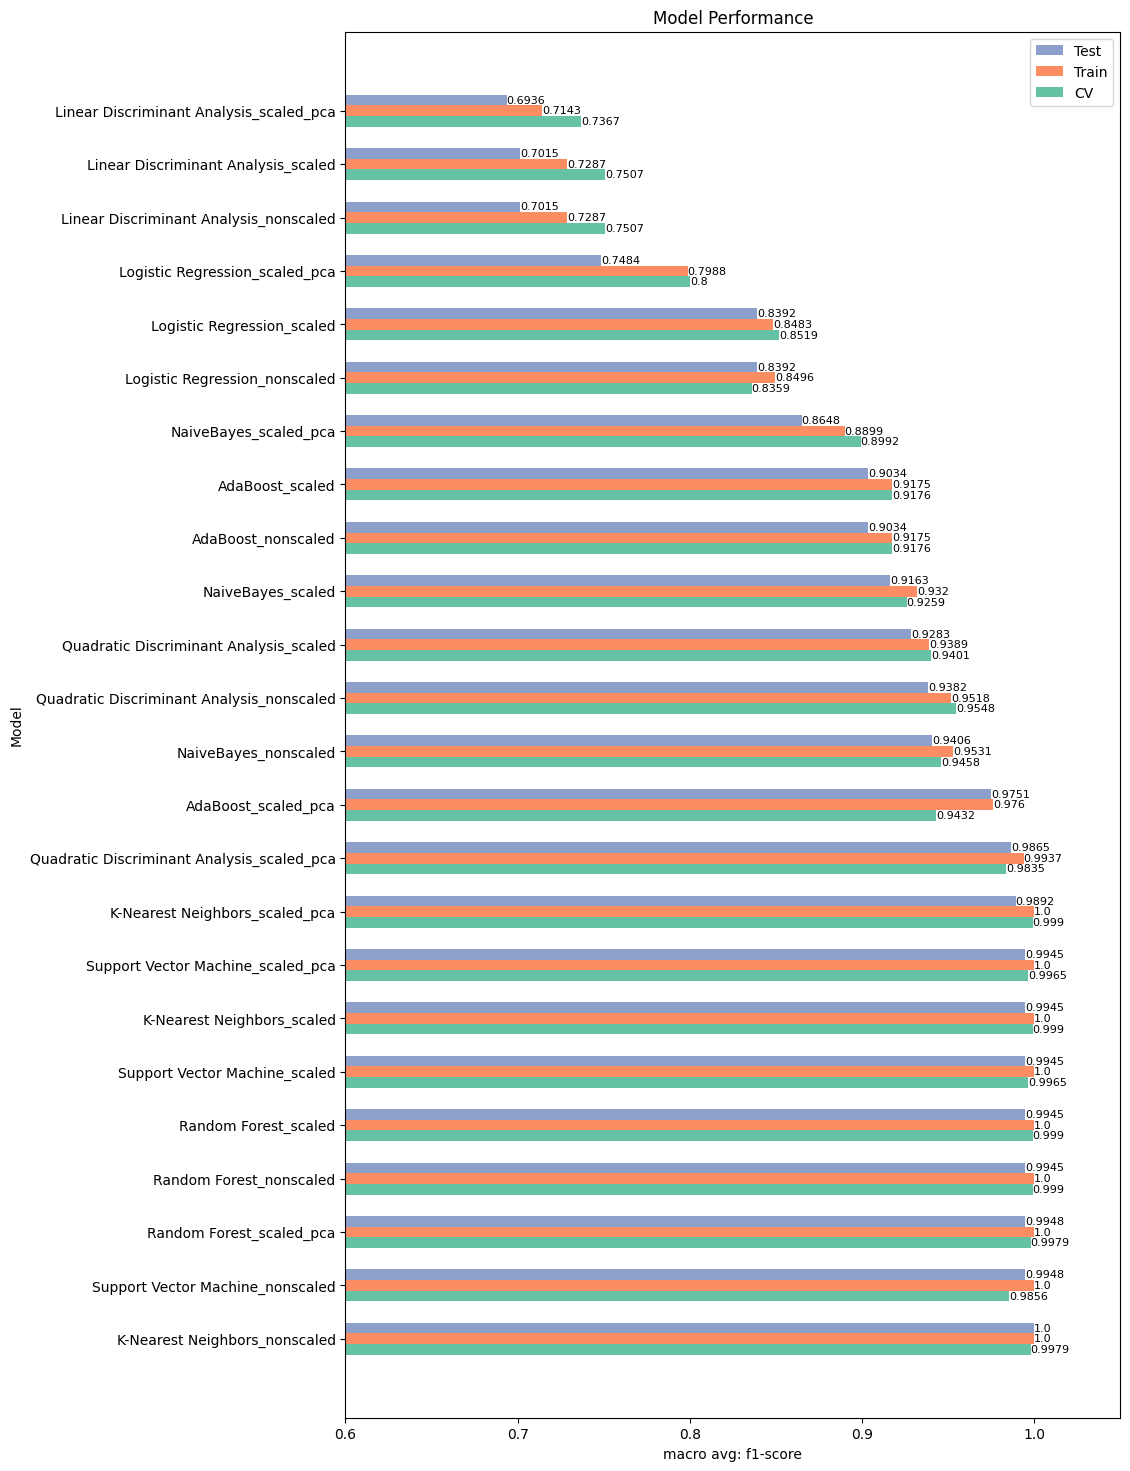

In [32]:
# Sort the dataframe based on the Test Score
df_res = df_res_all.sort_values(by='score_test', ascending=False)

# Define pastel colors
soft_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Plotting the bar chart with pastel colors
fig, ax = plt.subplots(figsize=(10, 18))
bar_width = 0.2
bar_positions = np.arange(len(df_res['model']))

# Plotting each score with pastel colors
ax.barh(bar_positions - bar_width, df_res['score_cv'], bar_width, label='CV', color=soft_colors[0])
ax.barh(bar_positions, df_res['score_train'], bar_width, label='Train', color=soft_colors[1])
ax.barh(bar_positions + bar_width, df_res['score_test'], bar_width, label='Test', color=soft_colors[2])

# Adding text labels on the right of each bar with rotation
def add_labels(bars):
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', 
                 va='center', fontsize=8)

add_labels(ax.patches)

# Adding labels and title
ax.set_yticks(bar_positions)
ax.set_yticklabels(df_res['model_dataprep'])
ax.set_xlabel(f'{matric1}: {matric2}')
ax.set_xlim(0.6, 1.05)
ax.set_ylabel('Model')
ax.set_title('Model Performance')

# Reordering the legend labels to match the order of bars
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right')

# Show the plot
plt.show()